## Name: Souri Rishik Volety
## Reg No: 230968004

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

In [20]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

In [21]:
num_classes_fmnist = len(np.unique(y_train_fmnist))
print(f"Number of classes in Fashion MNIST: {num_classes_fmnist}")

Number of classes in Fashion MNIST: 10


In [22]:
print(f"Image shape: {x_train_fmnist[0].shape}")

Image shape: (28, 28)


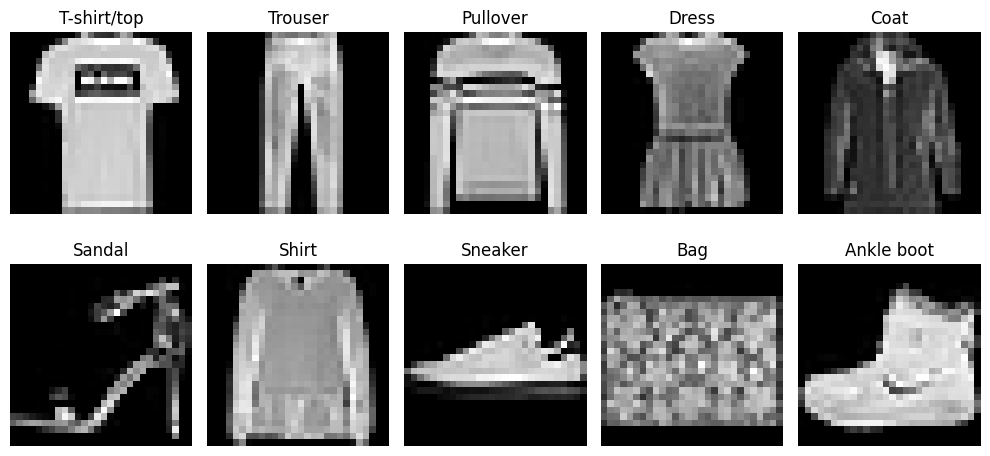

In [23]:
class_names_fmnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                      'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(num_classes_fmnist):
    idx = np.where(y_train_fmnist == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_fmnist[idx], cmap='gray')
    plt.title(class_names_fmnist[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
x_train_fmnist = x_train_fmnist / 255.0
x_test_fmnist = x_test_fmnist / 255.0

x_train_fmnist_cnn = x_train_fmnist.reshape(-1, 28, 28, 1)
x_test_fmnist_cnn = x_test_fmnist.reshape(-1, 28, 28, 1)

y_train_fmnist_cat = to_categorical(y_train_fmnist)
y_test_fmnist_cat = to_categorical(y_test_fmnist)

In [10]:
fcnn_fmnist = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes_fmnist, activation='softmax')
])

fcnn_fmnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_fcnn_fmnist = fcnn_fmnist.fit(
    x_train_fmnist, y_train_fmnist_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7473 - loss: 0.7222 - val_accuracy: 0.8414 - val_loss: 0.4304
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8340 - loss: 0.4595 - val_accuracy: 0.8508 - val_loss: 0.3972
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8458 - loss: 0.4273 - val_accuracy: 0.8395 - val_loss: 0.4230
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8531 - loss: 0.4082 - val_accuracy: 0.8593 - val_loss: 0.3750
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8605 - loss: 0.3895 - val_accuracy: 0.8643 - val_loss: 0.3658
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8600 - loss: 0.3852 - val_accuracy: 0.8707 - val_loss: 0.3490
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8647 - loss: 0.3722 - val_accuracy: 0.8636 - val_loss: 0.3588
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8711 - loss: 0.3531 - val_accuracy: 0

In [11]:
test_loss, test_acc = fcnn_fmnist.evaluate(x_test_fmnist, y_test_fmnist_cat, verbose=0)
print(f"FCNN test Accuracy for Fashion MNIST: {test_acc:.4f}")

FCNN test Accuracy for Fashion MNIST: 0.8804


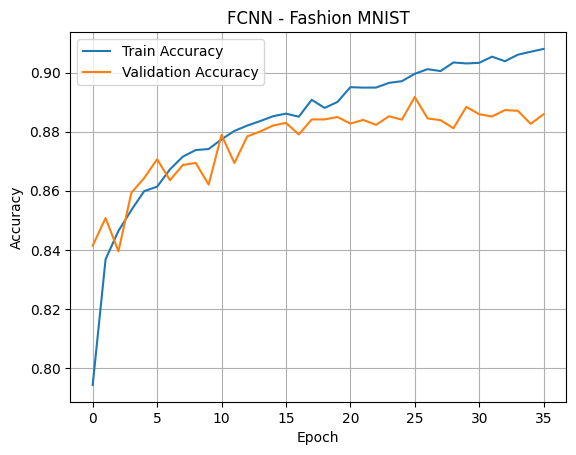

In [12]:
plt.plot(history_fcnn_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('FCNN - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
cnn1_fmnist = Sequential([
    Conv2D(32, (5, 5), strides=1, padding='valid', input_shape=(28, 28, 1)),
    tf.keras.layers.ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.3),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(num_classes_fmnist, activation='softmax')
])
cnn1_fmnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history_cnn1_fmnist = cnn1_fmnist.fit(
    x_train_fmnist_cnn, y_train_fmnist_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7383 - loss: 0.7269 - val_accuracy: 0.8703 - val_loss: 0.3677
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8633 - loss: 0.3838 - val_accuracy: 0.8839 - val_loss: 0.3192
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8773 - loss: 0.3397 - val_accuracy: 0.8915 - val_loss: 0.3029
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8877 - loss: 0.3107 - val_accuracy: 0.8956 - val_loss: 0.2835
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8925 - loss: 0.2950 - val_accuracy: 0.8963 - val_loss: 0.2751
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8992 - loss: 0.2772 - val_accuracy: 0.9014 - val_loss: 0.2733
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9045 - loss: 0.2583 - val_accuracy: 0.9009 - val_loss: 0.2662
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9090 - loss: 0.2456 - val_acc

In [55]:
test_loss, test_acc = cnn1_fmnist.evaluate(x_test_fmnist_cnn, y_test_fmnist_cat, verbose=0)
print(f"CNN1 test Accuracy for Fashion MNIST: {test_acc:.4f}")

CNN1 test Accuracy for Fashion MNIST: 0.9014


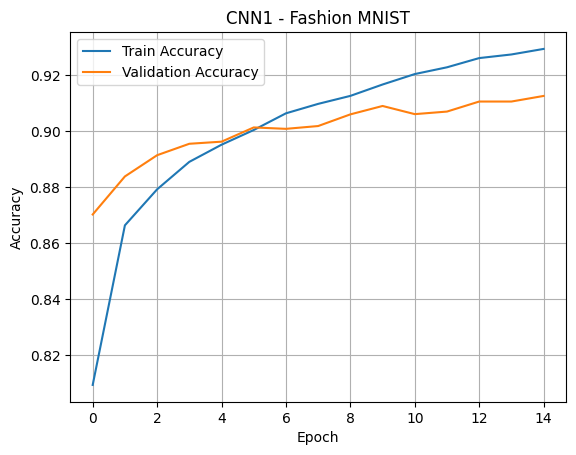

In [56]:
plt.plot(history_cnn1_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN1 - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
cnn2_fmnist = Sequential([
    Conv2D(32, (3, 3), strides=1, padding='valid', input_shape=(28, 28, 1)),
    BatchNormalization(),
    tf.keras.layers.ReLU(),

    Conv2D(32, (3, 3), strides=1, padding='valid'),
    BatchNormalization(),
    tf.keras.layers.ReLU(),

    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(num_classes_fmnist, activation='softmax')
])

cnn2_fmnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history_cnn2_fmnist = cnn2_fmnist.fit(
    x_train_fmnist_cnn, y_train_fmnist_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7491 - loss: 0.7253 - val_accuracy: 0.8708 - val_loss: 0.3548
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8622 - loss: 0.3849 - val_accuracy: 0.8946 - val_loss: 0.2902
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8813 - loss: 0.3250 - val_accuracy: 0.9007 - val_loss: 0.2663
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8925 - loss: 0.2934 - val_accuracy: 0.9109 - val_loss: 0.2455
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9031 - loss: 0.2631 - val_accuracy: 0.9087 - val_loss: 0.2498
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9081 - loss: 0.2460 - val_accuracy: 0.9146 - val_loss: 0.2371
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9151 - loss: 0.2271 - val_accuracy: 0.9120 - val_loss: 0.2388
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9193 - loss: 0.2175 - 

In [60]:
test_loss, test_acc = cnn2_fmnist.evaluate(x_test_fmnist_cnn, y_test_fmnist_cat, verbose=0)
print(f"CNN2 test Accuracy for Fashion MNIST: {test_acc:.4f}")

CNN2 test Accuracy for Fashion MNIST: 0.9137


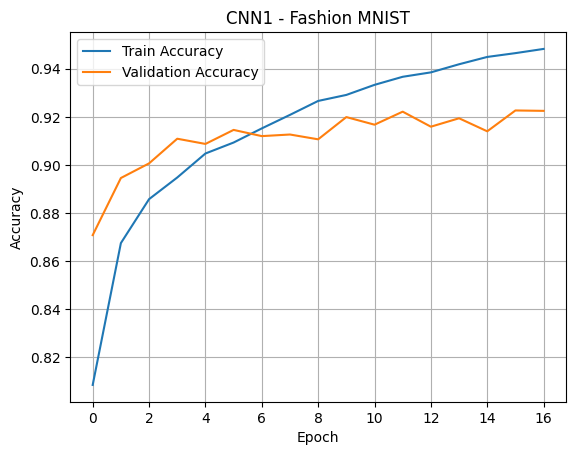

In [64]:
plt.plot(history_cnn2_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN1 - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

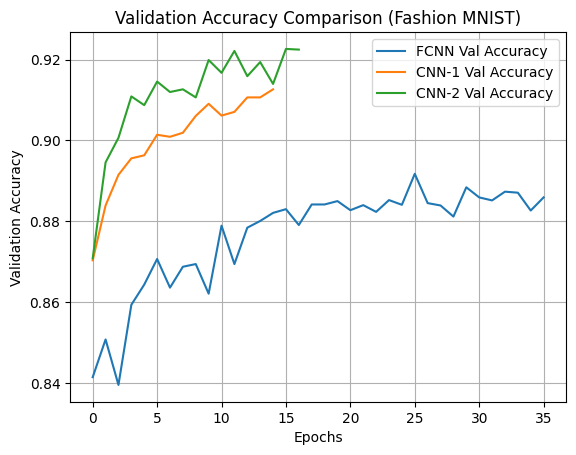

In [65]:
plt.plot(history_fcnn_fmnist.history['val_accuracy'], label='FCNN Val Accuracy')
plt.plot(history_cnn1_fmnist.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2_fmnist.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title('Validation Accuracy Comparison (Fashion MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [12]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

In [13]:
print(f"Number of classes in CIFAR-10: {len(np.unique(y_train_cifar))}")

Number of classes in CIFAR-10: 10


In [14]:
print(f"Image shape: {x_train_cifar[0].shape}")

Image shape: (32, 32, 3)


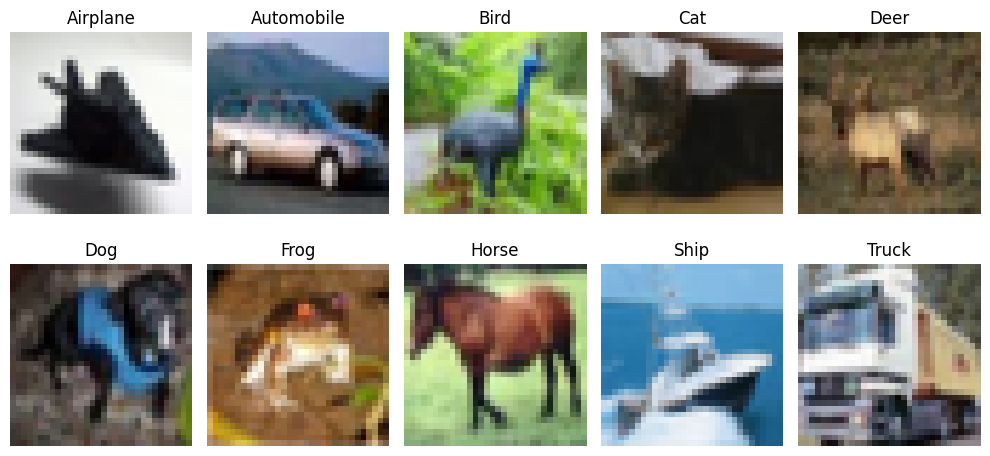

In [15]:
class_names_cifar = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                     'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,5))
for i in range(10):
    idx = np.where(y_train_cifar == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_cifar[idx])
    plt.title(class_names_cifar[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

y_train_cifar_cat = to_categorical(y_train_cifar)
y_test_cifar_cat = to_categorical(y_test_cifar)

In [25]:
fcnn_cifar = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

fcnn_cifar.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_fcnn_cifar = fcnn_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=75, validation_split=0.2, batch_size=64)

Epoch 1/75
625/625 [==============================] - 4s 5ms/step - loss: 1.8874 - accuracy: 0.3158 - val_loss: 1.7409 - val_accuracy: 0.3766
Epoch 2/75
625/625 [==============================] - 3s 5ms/step - loss: 1.6990 - accuracy: 0.3882 - val_loss: 1.7270 - val_accuracy: 0.3768
Epoch 3/75
625/625 [==============================] - 3s 5ms/step - loss: 1.6205 - accuracy: 0.4201 - val_loss: 1.6195 - val_accuracy: 0.4224
Epoch 4/75
625/625 [==============================] - 3s 5ms/step - loss: 1.5556 - accuracy: 0.4430 - val_loss: 1.5971 - val_accuracy: 0.4281
Epoch 5/75
625/625 [==============================] - 3s 5ms/step - loss: 1.5152 - accuracy: 0.4598 - val_loss: 1.5479 - val_accuracy: 0.4555
Epoch 6/75
625/625 [==============================] - 3s 5ms/step - loss: 1.4734 - accuracy: 0.4705 - val_loss: 1.5828 - val_accuracy: 0.4364
Epoch 7/75
625/625 [==============================] - 3s 5ms/step - loss: 1.4398 - accuracy: 0.4841 - val_loss: 1.5090 - val_accuracy: 0.4638
Epoch 

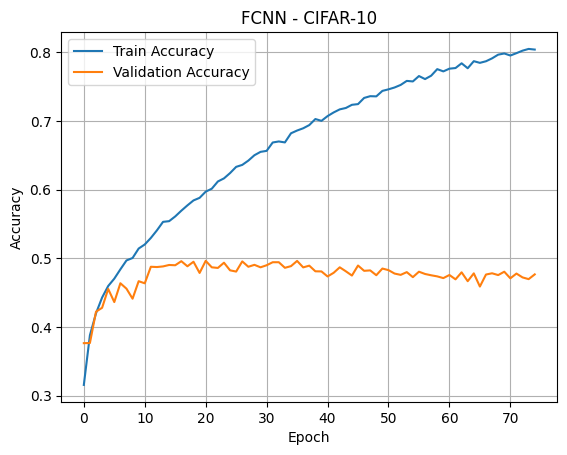

In [26]:
plt.plot(history_fcnn_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('FCNN - CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
cnn1_cifar = Sequential([
    Conv2D(32, (5, 5), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn1_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1_cifar = cnn1_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 1.5732 - accuracy: 0.4381 - val_loss: 1.3373 - val_accuracy: 0.5243
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.2454 - accuracy: 0.5610 - val_loss: 1.2591 - val_accuracy: 0.5572
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.1238 - accuracy: 0.6052 - val_loss: 1.1425 - val_accuracy: 0.6005
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0229 - accuracy: 0.6426 - val_loss: 1.1450 - val_accuracy: 0.5997
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9586 - accuracy: 0.6683 - val_loss: 1.0708 - val_accuracy: 0.6325
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8825 - accuracy: 0.6949 - val_loss: 1.0521 - val_accuracy: 0.6446
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8298 - accuracy: 0.7117 - val_loss: 1.0655 - val_accuracy: 0.6430
Epoch 

In [28]:
cnn2_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn2_cifar = cnn2_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 1.5023 - accuracy: 0.4577 - val_loss: 1.2393 - val_accuracy: 0.5682
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 1.1314 - accuracy: 0.6026 - val_loss: 1.0972 - val_accuracy: 0.6140
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9799 - accuracy: 0.6571 - val_loss: 1.0421 - val_accuracy: 0.6368
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8810 - accuracy: 0.6906 - val_loss: 1.0006 - val_accuracy: 0.6551
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.8002 - accuracy: 0.7224 - val_loss: 1.0081 - val_accuracy: 0.6599
Epoch 6/30
625/625 [==============================] - 3s 6ms/step - loss: 0.7278 - accuracy: 0.7458 - val_loss: 0.9987 - val_accuracy: 0.6639
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.6535 - accuracy: 0.7716 - val_loss: 1.0156 - val_accuracy: 0.6618
Epoch 

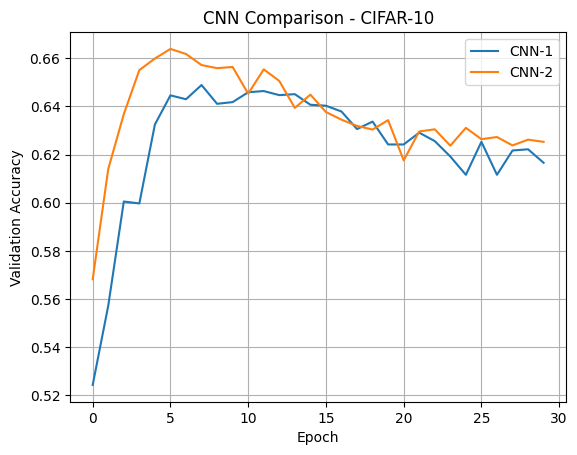

In [31]:
plt.plot(history_cnn1_cifar.history['val_accuracy'], label='CNN-1')
plt.plot(history_cnn2_cifar.history['val_accuracy'], label='CNN-2')
plt.title('CNN Comparison - CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()